# Image classifier

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# The feature map is 150x150x3: 150x150 for the image pixels, and 3 for the three color channels (R, G, and B)
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a one-dimensional tensor, to then add a fully connected layer
x = layers.Flatten()(x)

# Add a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with 4 nodes (for 4 classes) and softmax activation
output = layers.Dense(4, activation='softmax')(x)

model = Model(inputs=img_input, outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
              metrics=['accuracy'])

In [2]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,496,100 (36.22 MB)

 Trainable params: 9,496,100 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80% training, 20% validation


In [4]:
train_generator = datagen.flow_from_directory(
        '../../images',         # Directory where the 4 dog breeds are located
        target_size=(150, 150),  # Resize images to 150x150
        batch_size=20,
        class_mode='categorical',# Categorical labels for multiclass classification
        subset='training',       # Training subset
        shuffle=True
)

# Flow validation images (20% of data) from the directory
validation_generator = datagen.flow_from_directory(
        '../../images',
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical',
        subset='validation',     # Validation subset
        shuffle=True
)

Found 64 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


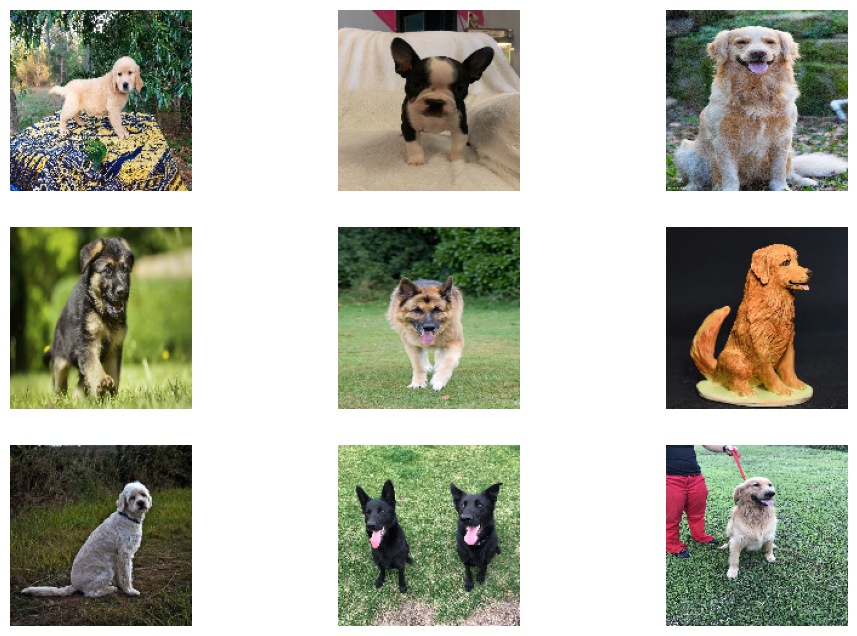

In [5]:
# Check images

import matplotlib.pyplot as plt

images, labels = next(train_generator)

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=40, # Number of batches per epoch (total_images // batch_size)
    epochs=15, # Number of times to iterate over the training data
    validation_data=validation_generator,
    validation_steps=50, # Number of batches for validation
    verbose=2
)

Epoch 1/15


/Users/fernandasecinaro/Library/Caches/pypoetry/virtualenvs/image-classifier-2tfNJVpE-py3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-09-23 19:22:13.804007: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/fernandasecinaro/.pyenv/versions/3.12.5/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


40/40 - 3s - 72ms/step - accuracy: 0.2969 - loss: 2.6880 - val_accuracy: 0.2500 - val_loss: 1.4605
Epoch 2/15


2024-09-23 19:22:14.717615: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


40/40 - 2s - 41ms/step - accuracy: 0.2969 - loss: 1.4153 - val_accuracy: 0.2500 - val_loss: 1.3802
Epoch 3/15


2024-09-23 19:22:16.345182: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


40/40 - 1s - 37ms/step - accuracy: 0.3906 - loss: 1.3841 - val_accuracy: 0.2500 - val_loss: 1.4267
Epoch 4/15
40/40 - 2s - 39ms/step - accuracy: 0.5469 - loss: 1.2216 - val_accuracy: 0.3125 - val_loss: 1.4316
Epoch 5/15


2024-09-23 19:22:19.363357: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


40/40 - 2s - 40ms/step - accuracy: 0.6562 - loss: 1.0539 - val_accuracy: 0.3125 - val_loss: 1.4159
Epoch 6/15
40/40 - 2s - 38ms/step - accuracy: 0.8438 - loss: 0.8297 - val_accuracy: 0.1875 - val_loss: 1.6000
Epoch 7/15
40/40 - 2s - 40ms/step - accuracy: 0.7969 - loss: 0.6380 - val_accuracy: 0.3125 - val_loss: 1.8717
Epoch 8/15
40/40 - 2s - 38ms/step - accuracy: 0.7656 - loss: 0.5915 - val_accuracy: 0.2500 - val_loss: 1.8247
Epoch 9/15


2024-09-23 19:22:25.573668: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


40/40 - 2s - 38ms/step - accuracy: 0.9375 - loss: 0.3452 - val_accuracy: 0.2500 - val_loss: 2.1551
Epoch 10/15
40/40 - 2s - 45ms/step - accuracy: 0.9375 - loss: 0.2203 - val_accuracy: 0.3125 - val_loss: 2.1408
Epoch 11/15
40/40 - 2s - 40ms/step - accuracy: 0.9688 - loss: 0.1042 - val_accuracy: 0.3125 - val_loss: 2.4443
Epoch 12/15
40/40 - 2s - 46ms/step - accuracy: 0.9844 - loss: 0.0638 - val_accuracy: 0.2500 - val_loss: 2.9121
Epoch 13/15
40/40 - 2s - 41ms/step - accuracy: 0.9844 - loss: 0.0498 - val_accuracy: 0.2500 - val_loss: 3.3802
Epoch 14/15
40/40 - 2s - 52ms/step - accuracy: 1.0000 - loss: 0.0133 - val_accuracy: 0.2500 - val_loss: 3.5644
Epoch 15/15
40/40 - 2s - 41ms/step - accuracy: 1.0000 - loss: 0.0148 - val_accuracy: 0.1875 - val_loss: 3.6976


In [7]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 

print("Loss: ",accuracy_score[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.1875 - loss: 3.6976
[3.6975948810577393, 0.1875]
Accuracy: 18.7500%
Loss:  3.6975948810577393


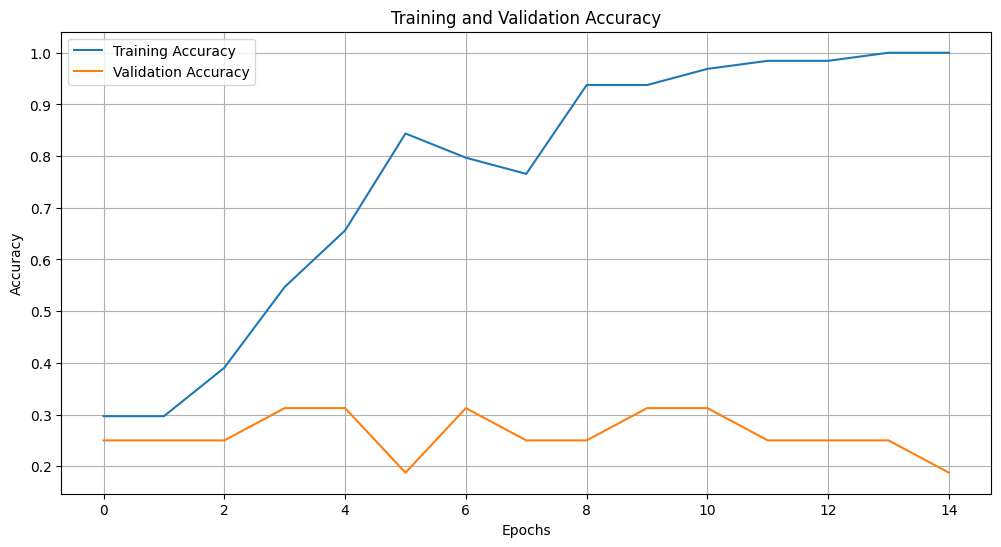

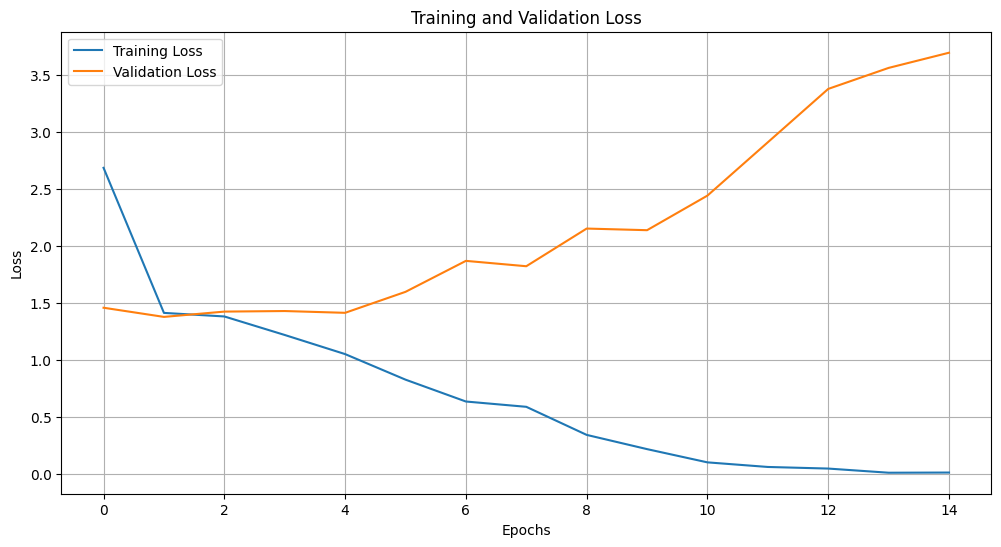

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

we could see the training accuracy increases while the validation accuracy decreases, so the model is overfitting.

The reason is that we have too few examples, so there's overfitting and our model could not generalize to new data

=> Data augmentation and dropout is needed